In [271]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [272]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [273]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


    - Уровень преступности на душу населения по городам
    - ЗН доля земли под жилую застройку зонирована на участки площадью более 25 000 кв. Футов.
    - INDUS доля акров, не относящихся к розничной торговле, на город
    - Фиктивная переменная CHAS Charles River (= 1, если участок ограничивает реку; 0 в противном случае)
    - Концентрация оксидов азота NOX (частей на 10 миллионов)
    - Среднее количество комнат в доме в РМ
    - ВОЗРАСТ доля домов, занимаемых владельцами, построенных до 1940 г.
    - DIS взвешенные расстояния до пяти бостонских центров занятости
    - Индекс доступности радиальных автомобильных дорог РАД
    - Ставка налога на имущество в размере полной стоимости за 10 000 долларов США.
    - Соотношение учеников и учителей PTRATIO по городам
    - B 1000 (Bk - 0,63) ^ 2, где Bk - доля черных по городам
    - LSTAT% более низкий статус населения
    - MEDV Средняя стоимость частных домов в 1000 долларов

### Первичные выводы:
1. Нет пропусков в данных.
2. В датасете все данные числовые, не сущ-т явных кандидатов на удаление, в виде текстовых данных или всевозможных ID.
3. Анализируем дальше

In [274]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


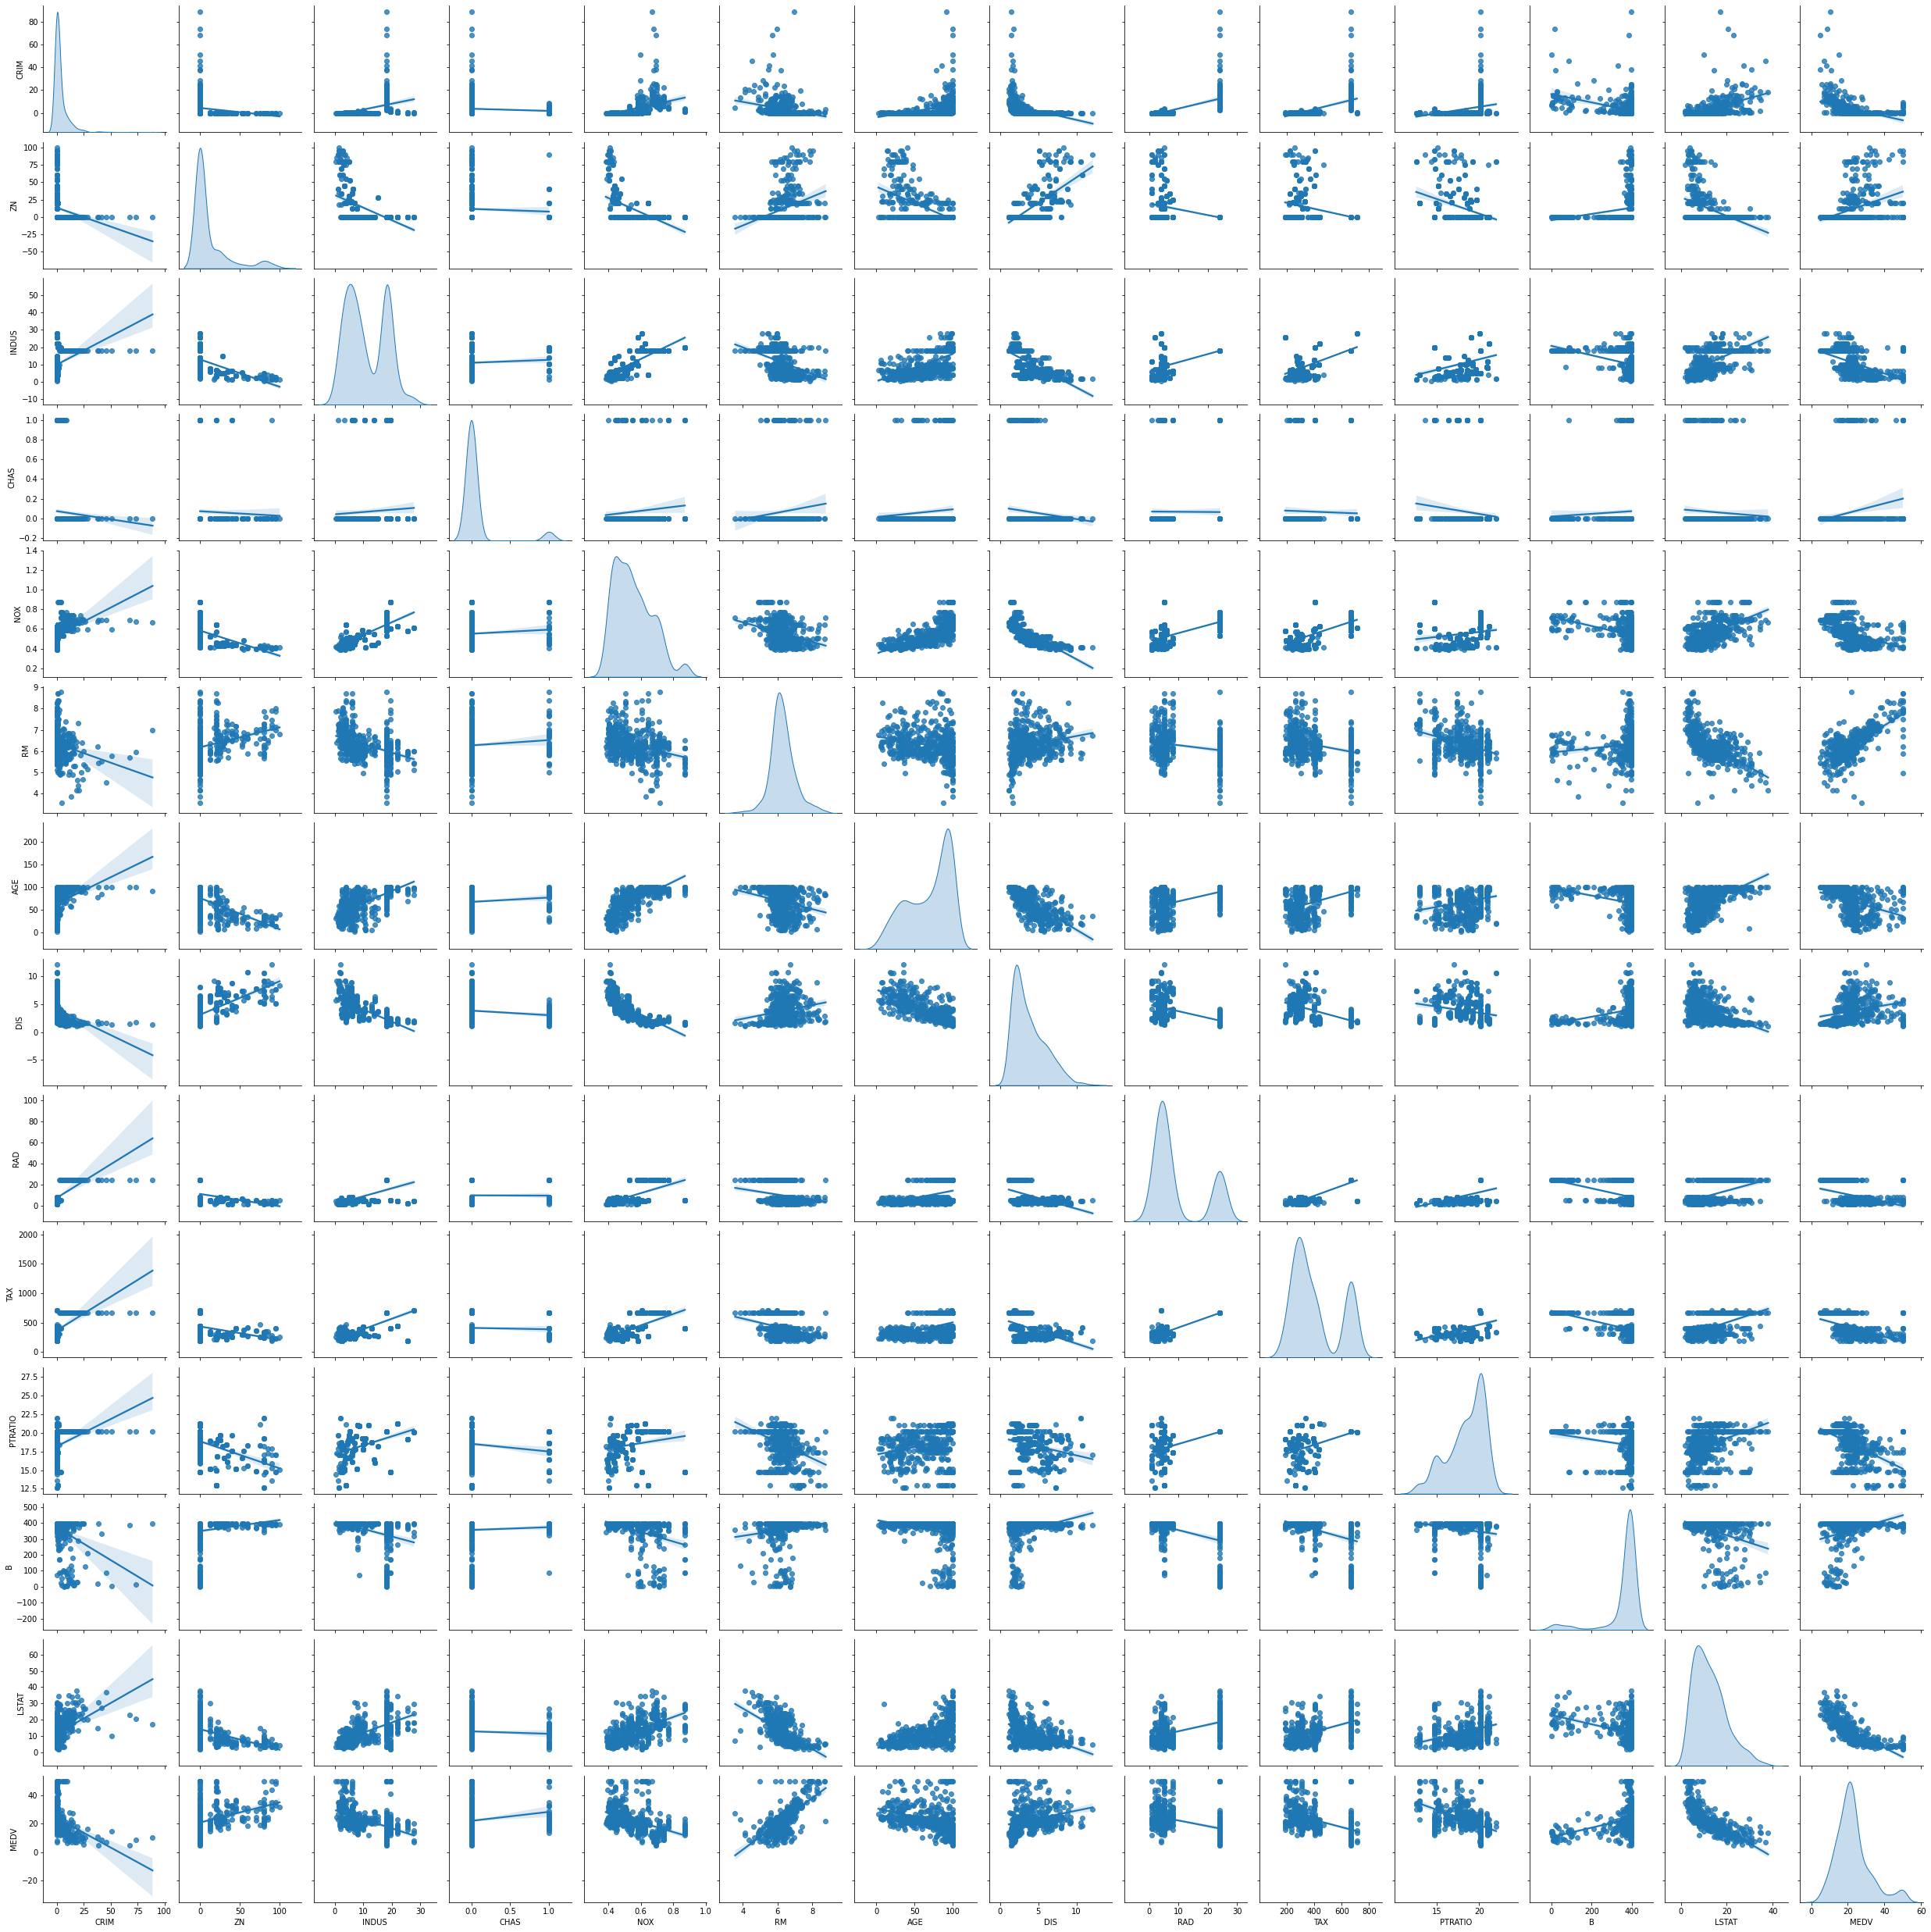

In [275]:
### Построим pairplot
sns.pairplot(data, kind='reg', diag_kind='kde')

### Зависимость таргета от фичей
1. Есть явная зависимость, похожая на линейную, между MEDV и RM
2. Есть зависимость, похожая на линейную между LSTAT и MEDV
3. Зависимость между NOX и MEDV
4. Неявного вида зависимости есть между ZN и MEDV, CRIM и MEDV, INDUS и MEDV, DIS и MEDV.

C:\Users\Yarmullin\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MEDV'>

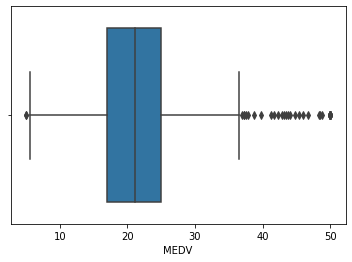

In [276]:
# Проверим на вылеты наш таргет
sns.boxplot(data['MEDV'])

In [277]:
#Посмотрим на вылеты слева
data[data['MEDV'] <=7]
#выкидываем данные из датасета с MEDV <7
data = data[data['MEDV'] >=7]
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [278]:
#пробуем обучить первую модель, воспользуемся standartscaler.
#в качестве факторов возьмем RM,LSTAT и NOX.
data1 =data[['RM', 'LSTAT', 'NOX', 'MEDV']]
y = data1['MEDV']
del data1['MEDV']
X_train, X_test, y_train, y_test = train_test_split(data1, y, test_size=0.3, random_state=42)

In [279]:
model = make_pipeline(StandardScaler(),LinearRegression())

In [280]:
model.fit( X_train, y_train )

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [281]:
model.score(X_train, y_train)

0.6001541966456752

In [282]:
model.score(X_test, y_test)

0.6898021400918419

In [283]:
print('Error: {}'.format(mean_absolute_error(model.predict(X_test), y_test)))

Error: 4.055469293278669


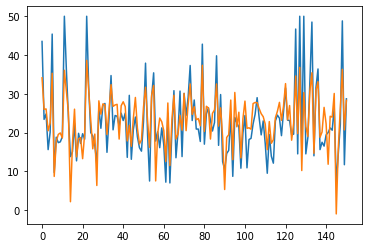

In [284]:
plt.plot(pd.DataFrame(zip(y_test, model.predict(X_test)), columns = ['y_test', 'pred']))


In [285]:
# попробуем добавить факторы в модель. Перебрал варианты - наилучшим оказалось добавление фактора DIS.
data2 =data[['RM', 'LSTAT', 'NOX', 'DIS', 'MEDV']]
y = data2['MEDV']
del data2['MEDV']
X2_train, X2_test, y2_train, y2_test = train_test_split(data2, y, test_size=0.3, random_state=42)

In [286]:
model.fit( X2_train, y2_train )

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [287]:
model.score(X2_test, y2_test)

0.6948588578557261

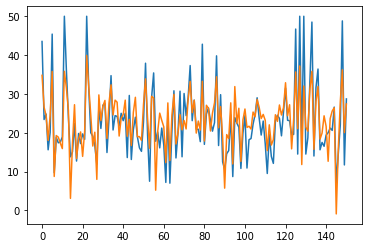

In [288]:
plt.plot(pd.DataFrame(zip(y2_test, model.predict(X2_test)), columns = ['y_test', 'pred']))

In [289]:
#добавим признак CHAS.
data3 =data[['RM', 'LSTAT', 'NOX', 'DIS', 'CHAS', 'MEDV']]
y = data3['MEDV']
del data3['MEDV']
X3_train, X3_test, y3_train, y3_test = train_test_split(data3, y, test_size=0.3, random_state=42)

In [290]:
model.fit( X3_train, y3_train )

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [291]:
model.score(X3_test, y3_test)

0.7033381876223186

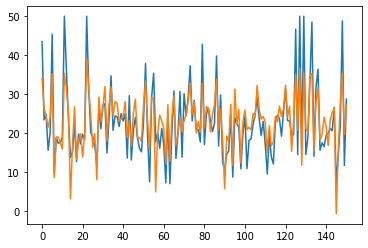

In [292]:
plt.plot(pd.DataFrame(zip(y3_test, model.predict(X3_test)), columns = ['y_test', 'pred']))

In [293]:
#добавим последовательно оставщиеся признаки. (последовательно добавлял все, оставил итоговый результат)
data4 =data[['RM', 'LSTAT', 'NOX', 'DIS', 'CHAS', 'AGE', 'TAX', 'PTRATIO', 'B', 'MEDV']]
y = data4['MEDV']
del data4['MEDV']
X4_train, X4_test, y4_train, y4_test = train_test_split(data4, y, test_size=0.3, random_state=42)

In [294]:
model.fit( X4_train, y4_train )

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [295]:
model.score(X4_test, y4_test)

0.7598857307185457

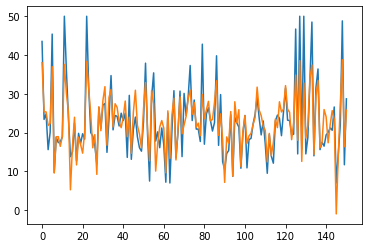

In [296]:
#первый вариант итоговой модели.
plt.plot(pd.DataFrame(zip(y4_test, model.predict(X4_test)), columns = ['y_test', 'pred']))

#### изучая график, можем предположить, что модель недостаточно хорошо описывает "дорогую" недвижимость, т.е. свыше 38 тыс долл.
#### из боксплота выше мы увидели, что у нас есть правые вылеты после значения 38 тыс долл. Попробуем проанализировать этот кусок датасета отдельно.

C:\Users\Yarmullin\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='RM'>

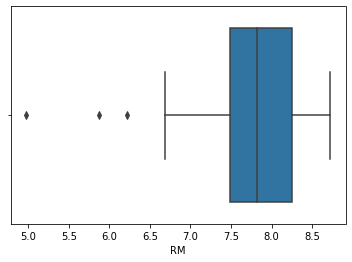

In [297]:
data5 = data[['RM','MEDV']].sort_values('RM')
data5 = data5[data5['MEDV'] >=38]
sns.boxplot(data5['RM'])

In [298]:
#выкинем еще 3 строчки из нашего датасета (RM < 6.22 & MEDV = 50)
data5

,RM,MEDV
368,4.970,50.0
372,5.875,50.0
371,6.216,50.0
369,6.683,50.0
157,6.943,41.3
370,7.016,50.0
256,7.454,44.0
268,7.470,43.5
161,7.489,50.0
261,7.520,43.1


In [299]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [300]:
data7 = data[ (data['RM'] >= 6.22) | (data['MEDV'] != 50.0) ]

In [301]:
data7

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


C:\Users\Yarmullin\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MEDV'>

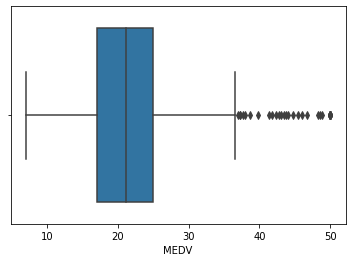

In [302]:
sns.boxplot(data7['MEDV'])

In [303]:
#пробуем обучить модель
data8 =data7[['RM', 'LSTAT', 'NOX', 'DIS', 'CHAS', 'AGE', 'TAX', 'PTRATIO', 'B', 'MEDV']]
y = data8['MEDV']
del data8['MEDV']
X8_train, X8_test, y8_train, y8_test = train_test_split(data8, y, test_size=0.3, random_state=42)

In [304]:
model.fit( X8_train, y8_train )

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [305]:
model.score(X8_test, y8_test)

0.7888091623595039

In [306]:
model.score(X8_train, y8_train)

0.7460248006617951

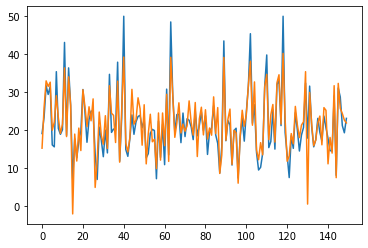

In [307]:
#второй вариант итоговой модели.
plt.plot(pd.DataFrame(zip(y8_test, model.predict(X8_test)), columns = ['y_test', 'pred']))